<a href="https://colab.research.google.com/github/muhamadfarrelrizqullah/PCVK_Ganjil_2023/blob/main/ProjekKelompok_DeteksiRPS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src = "https://raw.githubusercontent.com/alvianfirdaus/Kelompok3_ML/main/Kuis%201/img/header.png"><p><table>
  <tr>
    <th>Mata Kuliah </th>
    <td>Pengolahan Citra Visi Komputer</td>
  </tr>
  <tr>
    <th>Ide Projek</th>
    <td>Deteksi Batu Gunting Kertas</td>
  </tr>

  <tr>
    <th>Kelompok</th>
    <td>Kelompok 14</td>
  </tr>
  <tr>
    <th>Nama Anggota Kelompok</th>
    <td><p>
     Mochammad Aditya Bagus / 2041720093<p>
     Muhamad Farrel Rizqullah / 2141720243<p>
</td>
  </tr>
</table>

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras import layers
from keras.layers import GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

import numpy as np
from google.colab import files
#from keras.preprocessing import image
import keras.utils as image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#load model
from keras.models import load_model

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!unzip '/content/drive/MyDrive/rockpaperscissors.zip' -d '/tmp/'

Archive:  /content/drive/MyDrive/rockpaperscissors.zip
   creating: /tmp/rockpaperscissors/paper/
  inflating: /tmp/rockpaperscissors/paper/paper01-000.png  
  inflating: /tmp/rockpaperscissors/paper/paper01-001.png  
  inflating: /tmp/rockpaperscissors/paper/paper01-002.png  
  inflating: /tmp/rockpaperscissors/paper/paper01-003.png  
  inflating: /tmp/rockpaperscissors/paper/paper01-004.png  
  inflating: /tmp/rockpaperscissors/paper/paper01-005.png  
  inflating: /tmp/rockpaperscissors/paper/paper01-006.png  
  inflating: /tmp/rockpaperscissors/paper/paper01-007.png  
  inflating: /tmp/rockpaperscissors/paper/paper01-008.png  
  inflating: /tmp/rockpaperscissors/paper/paper01-009.png  
  inflating: /tmp/rockpaperscissors/paper/paper01-010.png  
  inflating: /tmp/rockpaperscissors/paper/paper01-011.png  
  inflating: /tmp/rockpaperscissors/paper/paper01-012.png  
  inflating: /tmp/rockpaperscissors/paper/paper01-013.png  
  inflating: /tmp/rockpaperscissors/paper/paper01-014.png  
  

In [4]:
import os
data = ['paper', 'scissors', 'rock']

for data in data:
    print(f'{data} images: ', len(os.listdir(f'/tmp/rockpaperscissors/{data}')))

paper images:  840
scissors images:  840
rock images:  840


In [5]:
base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir, 'rps-cv-images')
validation_dir = os.path.join(base_dir, 'rps-cv-images')

In [6]:
os.listdir('/tmp/rockpaperscissors/rps-cv-images')

['rock', 'paper', 'scissors']

In [7]:
# pembuatan direktori untuk data latih dan validasi untuk batu, kertas, dan gunting.
train_rock_dir = os.path.join(train_dir, 'rock')
train_paper_dir = os.path.join(train_dir, 'paper')
train_scissors_dir = os.path.join(train_dir, 'scissors')
validation_rock_dir = os.path.join(validation_dir, 'rock')
validation_paper_dir = os.path.join(validation_dir, 'paper')
validation_scissors_dir = os.path.join(validation_dir, 'scissors')

In [8]:
print('There are :', len(train_rock_dir), 'images of rock inside the folder.')
print('There are :', len(train_paper_dir), 'images of paper inside the folder.')
print('There are :', len(train_scissors_dir), 'images of scissors inside the folder.')

There are : 41 images of rock inside the folder.
There are : 42 images of paper inside the folder.
There are : 45 images of scissors inside the folder.


In [9]:
#data latih dan validasi
train_datagen = ImageDataGenerator(
        #normalisasi nilai pixel
        rescale=1./255,
        #rotasi acak dalam derajat
        rotation_range=30,
        #balik gambar secara horizontal dan acak
        horizontal_flip=True,
        #rentang geser intensitas
        shear_range = 0.2,
        #rentang acak zoom
        zoom_range = 0.2,
        #persentase data yang digunakan sebagai validasi
        validation_split = 0.2,
        #metode yang digunakan mengisi pixel yang kosong setelah transformasi
        fill_mode = 'nearest')

train_generator = train_datagen.flow_from_directory(
        #tempat data
        train_dir,
        #ukuran yang diinginkan
        target_size=(100, 100),
        #jumlah sampel
        batch_size=32,
        #mode gambar
        color_mode = 'rgb',
        #urutan data apakah harus diacak
        shuffle=True,
        #subset data yang digunakan
        subset = 'training',
        #mode kelas yang digunakan 'cagegorical' untuk klasifikasi multi kelas
        class_mode = 'categorical')

validation_generator = train_datagen.flow_from_directory(
        validation_dir,
        target_size=(100, 100),
        batch_size=32,
        color_mode = 'rgb',
        shuffle=False,
        subset = 'validation',
        class_mode = 'categorical')

Found 300 images belonging to 3 classes.
Found 72 images belonging to 3 classes.


In [10]:
#dibuat dari instance model sebelumnya
class_base = keras.applications.VGG16(
    include_top=False,
    weights='imagenet',
    input_shape=(100, 100, 3)
)
class_base.trainable = False

58889256/58889256 [==============================] - 4s 0us/step


In [11]:
final_model = tf.keras.models.Sequential([
    class_base,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])

final_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 global_average_pooling2d (  (None, 512)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 3)                 771       
                                                                 
Total params: 14846787 (56.64 MB)
Trainable params: 132099 (516.01 KB)
Non-trainable params: 14714688 (56.13 MB)
_________

In [13]:
final_model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model_fit = final_model.fit_generator(
    train_generator,
    validation_data  = validation_generator,
    epochs = 10,
    verbose = 1
)

<ipython-input-13-e95489c19c99>:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_fit = final_model.fit_generator(


Epoch 1/10
10/10 [==============================] - 9s 452ms/step - loss: 0.9947 - accuracy: 0.5200 - val_loss: 0.7337 - val_accuracy: 0.8056
Epoch 2/10
10/10 [==============================] - 3s 262ms/step - loss: 0.7411 - accuracy: 0.7000 - val_loss: 0.5452 - val_accuracy: 0.9167
Epoch 3/10
10/10 [==============================] - 4s 428ms/step - loss: 0.5382 - accuracy: 0.8533 - val_loss: 0.4196 - val_accuracy: 0.9167
Epoch 4/10
10/10 [==============================] - 3s 280ms/step - loss: 0.4126 - accuracy: 0.8967 - val_loss: 0.4031 - val_accuracy: 0.8611
Epoch 5/10
10/10 [==============================] - 2s 231ms/step - loss: 0.2917 - accuracy: 0.9533 - val_loss: 0.2933 - val_accuracy: 0.9306
Epoch 6/10
10/10 [==============================] - 2s 251ms/step - loss: 0.2420 - accuracy: 0.9500 - val_loss: 0.3246 - val_accuracy: 0.8611
Epoch 7/10
10/10 [==============================] - 2s 234ms/step - loss: 0.2115 - accuracy: 0.9400 - val_loss: 0.2346 - val_accuracy: 0.9167
Epoch 

In [14]:
#simpan data training ke dalam drive
save_path ='/content/drive/MyDrive/dataset/models/PCVK/rockpaperscissorsm1'
final_model.save(save_path)

In [15]:
#load model untuk demo
save_path = '/content/drive/MyDrive/dataset/models/PCVK/rockpaperscissorsm1'
final_model = load_model(save_path)

Saving testscissors03-119.png to testscissors03-119.png
1/1 [==============================] - 0s 20ms/step
This image belongs to: 2
Gunting
testscissors03-119.png


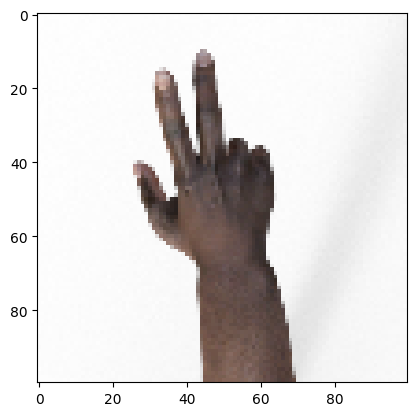

In [20]:
uploaded = files.upload()

for itr in uploaded.keys():

  path = itr
  picture = image.load_img(path, target_size=(100,100))
  imgplot = plt.imshow(picture)
  x = image.img_to_array(picture)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = final_model.predict(images, batch_size=7)
  define_class = int(classes.argmax(axis=-1))
  print("This image belongs to:", define_class)
  if (define_class==0):
    print("Batu")
  elif (define_class==1):
    print("Kertas")
  elif (define_class==2):
    print("Gunting")

  print(itr)

Saving rock07-k03-119.png to rock07-k03-119.png
1/1 [==============================] - 0s 34ms/step
This image belongs to: 0
Batu
rock07-k03-119.png


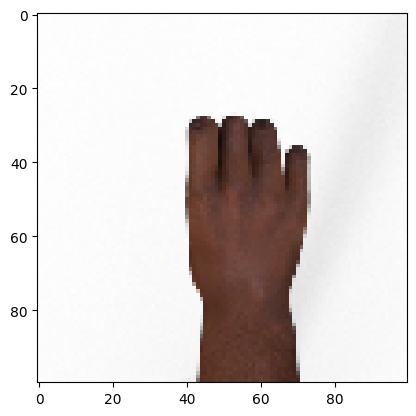

In [21]:
uploaded = files.upload()

for itr in uploaded.keys():

  path = itr
  picture = image.load_img(path, target_size=(100,100))
  imgplot = plt.imshow(picture)
  x = image.img_to_array(picture)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = final_model.predict(images, batch_size=7)
  define_class = int(classes.argmax(axis=-1))
  print("This image belongs to:", define_class)
  if (define_class==0):
    print("Batu")
  elif (define_class==1):
    print("Kertas")
  elif (define_class==2):
    print("Gunting")

  print(itr)